<a href="https://colab.research.google.com/github/aloksharma-1/Credit-card-fraud-detection-Full-project/blob/main/credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.preprocessing import OrdinalEncoder

# Load Dataset

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
data=pd.read_csv('/content/gdrive/MyDrive/paysim1.csv')

# About The Dataset

### This dataset is a synthetic dataset created to simulate financial transactions in a mobile money system. The dataset consists of approximately 6 million records of transactions, which include attributes such as transaction amount, type, and timestamp, as well as information about the sender and receiver of the transaction.

In [99]:
data.head(15)

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,3,9839.64,170136.00,160296.36,0.0,0.00,0.0
1,3,1864.28,21249.00,19384.72,0.0,0.00,0.0
2,4,181.00,181.00,0.00,0.0,0.00,1.0
3,1,181.00,181.00,0.00,21182.0,0.00,1.0
4,3,11668.14,41554.00,29885.86,0.0,0.00,0.0
5,3,7817.71,53860.00,46042.29,0.0,0.00,0.0
6,3,7107.77,183195.00,176087.23,0.0,0.00,0.0
7,3,7861.64,176087.23,168225.59,0.0,0.00,0.0
8,3,4024.36,2671.00,0.00,0.0,0.00,0.0
9,2,5337.77,41720.00,36382.23,41898.0,40348.79,0.0


## Drop unnecessary columns

In [5]:
data.drop(['step', 'nameOrig', 'nameDest','isFlaggedFraud'], axis=1, inplace=True)

In [98]:
data.head(15)

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,3,9839.64,170136.00,160296.36,0.0,0.00,0.0
1,3,1864.28,21249.00,19384.72,0.0,0.00,0.0
2,4,181.00,181.00,0.00,0.0,0.00,1.0
3,1,181.00,181.00,0.00,21182.0,0.00,1.0
4,3,11668.14,41554.00,29885.86,0.0,0.00,0.0
5,3,7817.71,53860.00,46042.29,0.0,0.00,0.0
6,3,7107.77,183195.00,176087.23,0.0,0.00,0.0
7,3,7861.64,176087.23,168225.59,0.0,0.00,0.0
8,3,4024.36,2671.00,0.00,0.0,0.00,0.0
9,2,5337.77,41720.00,36382.23,41898.0,40348.79,0.0


# Handle missing values

In [7]:
data.isnull().sum()

type              0
amount            1
oldbalanceOrg     1
newbalanceOrig    1
oldbalanceDest    1
newbalanceDest    1
isFraud           1
dtype: int64

# Collect Data Information

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56203 entries, 0 to 56202
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   type            56203 non-null  object 
 1   amount          56202 non-null  float64
 2   oldbalanceOrg   56202 non-null  float64
 3   newbalanceOrig  56202 non-null  float64
 4   oldbalanceDest  56202 non-null  float64
 5   newbalanceDest  56202 non-null  float64
 6   isFraud         56202 non-null  float64
dtypes: float64(6), object(1)
memory usage: 3.0+ MB


# Handle missing values

In [9]:
data.dropna(inplace=True)

# Data Analysis

In [10]:
print(data.shape)

(56202, 7)


In [11]:
data.isnull().sum()

type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

# Create a histogram of transaction amounts

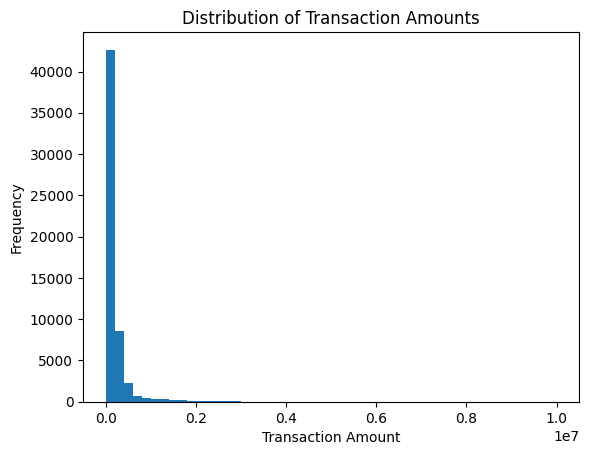

In [12]:
plt.hist(data['amount'], bins=50)
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Transaction Amounts')
plt.show()

In [13]:
z = data["type"].value_counts()

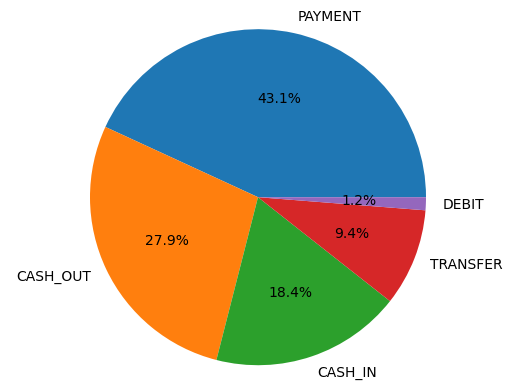

In [14]:
plt.pie(z, labels=z.index, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

In [15]:
sender_data = data.loc[:, ["amount", "oldbalanceOrg"]]

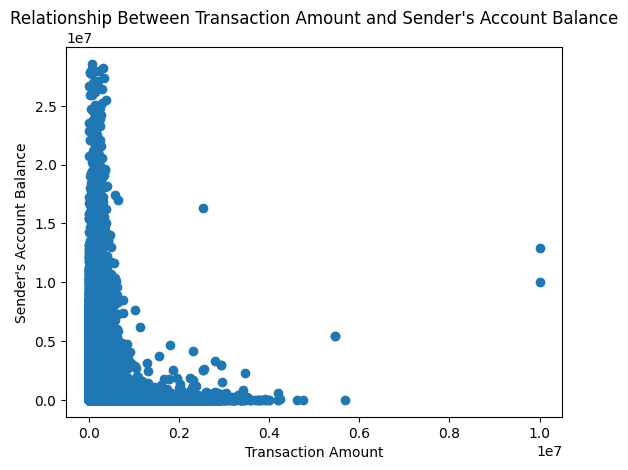

In [16]:
plt.scatter(sender_data["amount"], sender_data["oldbalanceOrg"])
plt.xlabel("Transaction Amount")
plt.ylabel("Sender's Account Balance")
plt.title("Relationship Between Transaction Amount and Sender's Account Balance")
plt.show()

In [17]:
corr_matrix = data.corr()

<ipython-input-17-bf8eb1dc5e60>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


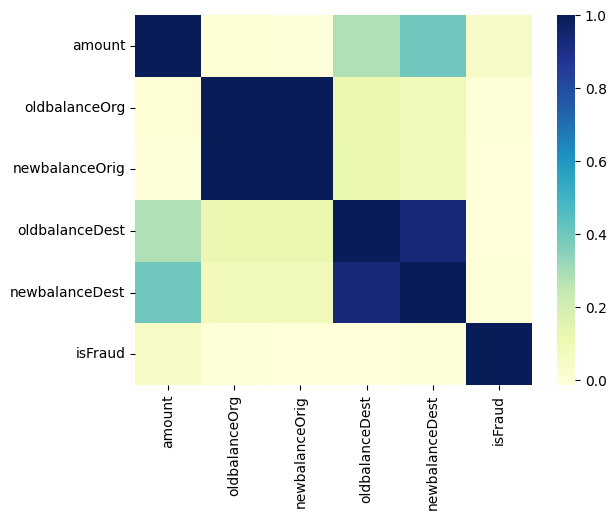

In [18]:
sns.heatmap(corr_matrix, cmap="YlGnBu")
plt.show()

In [19]:
amount = data['amount']

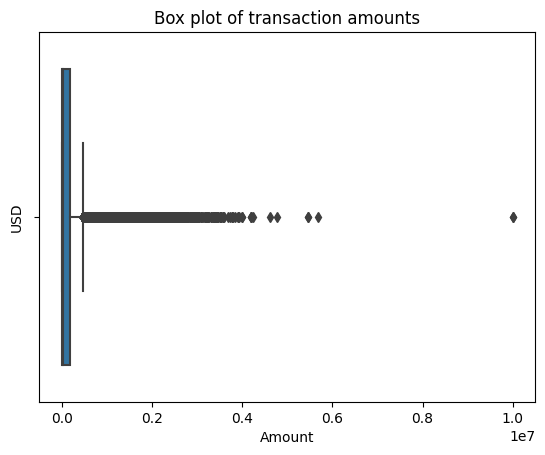

In [20]:
sns.boxplot(x=amount)
plt.xlabel("Amount")
plt.ylabel("USD")
plt.title("Box plot of transaction amounts")
plt.show()

# Convert categorical variables to numerical

In [21]:
le = LabelEncoder()
data['type'] = le.fit_transform(data['type'])

In [100]:
data.head(15)

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,3,9839.64,170136.00,160296.36,0.0,0.00,0.0
1,3,1864.28,21249.00,19384.72,0.0,0.00,0.0
2,4,181.00,181.00,0.00,0.0,0.00,1.0
3,1,181.00,181.00,0.00,21182.0,0.00,1.0
4,3,11668.14,41554.00,29885.86,0.0,0.00,0.0
5,3,7817.71,53860.00,46042.29,0.0,0.00,0.0
6,3,7107.77,183195.00,176087.23,0.0,0.00,0.0
7,3,7861.64,176087.23,168225.59,0.0,0.00,0.0
8,3,4024.36,2671.00,0.00,0.0,0.00,0.0
9,2,5337.77,41720.00,36382.23,41898.0,40348.79,0.0


# Data Selection

In [101]:
X = data.drop(['isFraud'], axis=1)
y = data['isFraud']

In [24]:
X.shape

(56202, 6)

In [25]:
X.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,3,9839.64,170136.0,160296.36,0.0,0.0
1,3,1864.28,21249.0,19384.72,0.0,0.0
2,4,181.00,181.0,0.00,0.0,0.0
3,1,181.00,181.0,0.00,21182.0,0.0
4,3,11668.14,41554.0,29885.86,0.0,0.0


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [26]:
y.shape

(56202,)

In [102]:
y.head(15)

0     0.0
1     0.0
2     1.0
3     1.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
Name: isFraud, dtype: float64

In [28]:
data.columns


Index(['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud'],
      dtype='object')

# Split the data into training and testing sets

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

In [65]:
print(trf1)

ColumnTransformer(remainder='passthrough',
                  transformers=[('ordinal', OrdinalEncoder(), ['type'])])


# Creating Pipe

In [66]:
trf1 = ColumnTransformer([
         ("ordinal", OrdinalEncoder(), 
         ['type'
        ] )
    ],remainder='passthrough')

In [67]:
trf2 = SelectKBest(score_func=chi2,k=6)

In [68]:
trf3 = RandomForestClassifier()
#trf3 = GaussianNB()
#trf3 = MultinomialNB()
#trf3 = BernoulliNB()
#trf3=LogisticRegression()
#trf3=SVC()

In [69]:
pipe = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),
    ('trf3',trf3),
])

In [70]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinal', OrdinalEncoder(),
                                                  ['type'])])),
                ('trf2',
                 SelectKBest(k=6,
                             score_func=<function chi2 at 0x7f340ebcb250>)),
                ('trf3', RandomForestClassifier())])

In [71]:
# Display Pipeline
from sklearn import set_config
set_config(display='diagram')

In [40]:
cols = pipe.named_steps.trf2.get_support(indices=True)

In [42]:
new_features = X_train.columns[cols]

In [43]:
new_features

Index(['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest'],
      dtype='object')

In [44]:
FIN=pipe.named_steps.trf3.feature_importances_

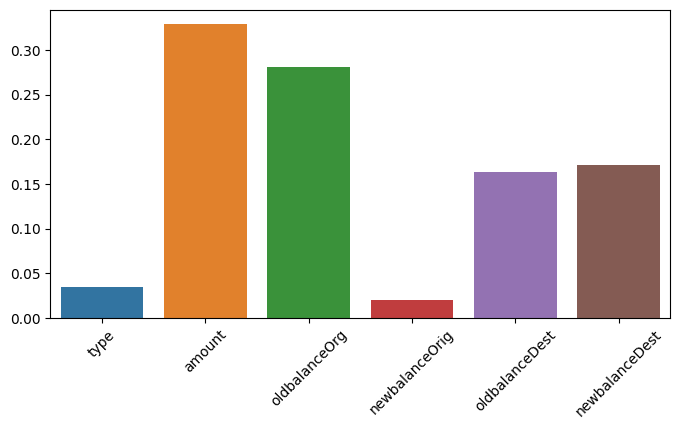

In [45]:
plt.figure(figsize = (8,4))
ax = sns.barplot(x = new_features, y =FIN)
plt.xticks(rotation=45)
plt.show()

In [46]:
prediction = pipe.predict(X_test)

In [47]:
prediction

array([0., 0., 0., ..., 0., 0., 0.])

In [48]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,prediction)

0.9988435192598524

In [93]:
# Make predictions on the testing set
c=(1 , 9839.64	,170136.0,	160296.36,	0.0,	0.0)
dat=pd.DataFrame([c],columns = ['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest'])
y_pred=pipe.predict(dat)
y_pred


array([0.])

In [50]:
# Evaluate the model
from sklearn.metrics import precision_score,recall_score, confusion_matrix, classification_report,accuracy_score, f1_score
print('Accuracy:', accuracy_score(y_test, prediction))
print('F1 score:', f1_score(y_test, prediction))
print('Recall:', recall_score(y_test, prediction))
print('Precision:', precision_score(y_test, prediction))
print('\n clasification report:\n', classification_report(y_test,prediction))
print('\n confussion matrix:\n',confusion_matrix(y_test, prediction))

Accuracy: 0.9988435192598524
F1 score: 0.6666666666666666
Recall: 0.52
Precision: 0.9285714285714286

 clasification report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     11216
         1.0       0.93      0.52      0.67        25

    accuracy                           1.00     11241
   macro avg       0.96      0.76      0.83     11241
weighted avg       1.00      1.00      1.00     11241


 confussion matrix:
 [[11215     1]
 [   12    13]]


# Cross Validation using Pipeline

In [94]:
# cross validation using cross_val_score
from sklearn.model_selection import cross_val_score
cross_val_score(pipe, X_train, y_train, cv=5, scoring='accuracy').mean()

0.998910176974341

# Exporting the Pipeline

In [97]:
# export 
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))